<figure>
  <IMG SRC="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Fachhochschule_Südwestfalen_20xx_logo.svg/320px-Fachhochschule_Südwestfalen_20xx_logo.svg.png" WIDTH=250 ALIGN="right">
</figure>

# Klassifikation mit Logistischer Regression

Bisher haben wir gesehen, wie man mit der linearen Regression Schätzfunktionen für lineare Modelle aufstellen und mithilfe des Gradientenverfahrens trainieren kann.
In diesem Arbeitsblatt wollen wir nun das Problem der Klassifikation betrachten.
Beispiele für Klassifikationsaufgaben sind:
- Werbung/Marketing: Wird ein Kunde ein bestimmtes Produkt kaufen?
- Qualitätssicherung: Ist ein bestimmtes Produkt ok oder defekt?
- Objekterkennung: Ist ein bestimmtes Objekt auf einem Bild zu sehen?
- Betrugserkennung: Liegt bei einer bestimmten Transaktion ein Betrugsfall vor?
- Finanzanalysen: Zahlt ein Kreditnehmer einen Kredit vollständig zurück?
- Medizin: Hat ein Patient eine bestimmte Krankheit?
- ...

Anders als bei der Regression, wo wir für einen neuen Datenpunkt einen möglichst genauen Schätzwert für eine abhängige Variable berechnet haben, geht es bei der Klassifikation darum, vorherzusagen, zu welcher Klasse der Datenpunkt gehört.
Statt einer kontinuierlichen Zielgröße wird also bei der Klassifikation eine diskrete abhängige Variable vorhergesagt.
Im einfachsten Fall ist die zu erklärende Variable binär, die Schätzungen haben also nur die Werte *ja* oder *nein*, bzw. `1` oder `0`.
Bei der *Multiklassen-Klassifikation* kann die Zielvariable mehr als 2 diskrete Werte annehmen, die jeweils eine bestimmte Klasse kodieren.
Beispielsweise kann ein Bilderkennungssystem vorhersagen, welches von 100 bekannten Objekten sich am wahrscheinlichsten auf einem Bild befindet.
Werden für die Schätzung der Zielgröße, wie es üblicherweise der Fall ist, mehrere unabhängige Variable herangezogen, spricht auch von einer multivariaten Klassifikation.

Grundsätzlich kann man ein Klassifikationsproblem auch mithilfe der *linearen Regression* angehen.
Z.B. indem man eine Schätzfunktion $f$ für eine binäre Zielvariable erstellt wobei man für die Vorhersage den Wert $f(x)$ als Wahrscheinlichkeit für die Zugehörigkeit  des Datenpunkt $x$ zur Klasse `1` interpretiert. D.h., die Werte $f(x)<0.5$ werden als `0`, die Werte $f(x)\ge0.5$ als `1` interpretiert. 
Allerdings ergeben sich dadurch einige Probleme, die die lineare Regression für Klassifikationsaufgaben nicht sehr praktikabel machen.
U.a. liefert die Schätzfunktion $f$ auch Werte kleiner `0` und größer `1`, was bei der Interpretation als Wahrscheinlichkeit widersinnig ist.

Die logistische Regression löst das Problem der Schätzfunktion indem Sie das Ergebnis der linearen Funktion durch eine geeignete Transformation auf den Wertebereich `0` bis `1` abgebildet.
Diese Transformation wird bei logistische Regression der logistischen Funktion (auch *Sigmoidfunktion* oder *S-Funktion*) durchgeführt.

## Beispiel: Logistische Regression mit Scikit-Learn

Bevor wir die Details der Logistischen Regression betrachten, wollen wir zunächst einen Anwendungsfall betrachten.
Der Datensatz *Kreditscoring zur Klassifikation von Kreditnehmern. 2010. Open Data LMU. (https://doi.org/10.5282/ubm/data.23)* beinhaltet 1000 Datensätze, die Vergaben von Privatkrediten beschreiben.
Die Spalten beschreiben verschiedene Merkmale, die die Art des Kredits sowie die Eigenschaften der Kunden beschreiben.
Beispiele sind Höhe und Laufzeiten der Darlehn sowie das Alter und das Beschäftigungsverhältnis der Kreditnehmer.
Die binaäre Zielgröße (auch *Dummy Variable* genannt) bildet die Spalte `kredit`.
Der Wert `1` bedeutet, dass für den entsprechenden Datenpunkt der Kredit zurückgezahlt wurde.
Entsprechend bedeutet `kredit=0`, dass der Kredit nicht ordnungsgemäß zurückgezahlt wurde.

Aufgrund dieser Datenbasis kann nun ein System entwickelt werden, dass für eine anstehende Kreditvergabe vorhersagt, ob der Kredit zurückgezalt wird.

Wir importieren zuerst die Pandas Bibliothek und laden den Datensatz `kredit.csv` in einen `DataFrame`.

In [1]:
import pandas as pd
df = pd.read_csv("kredit.csv")
df.head(10)

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


Mit `df.info()` und `df.describe()` erhalten wir einige Informationen über den Datensatz.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   kredit    1000 non-null   int64
 1   laufkont  1000 non-null   int64
 2   laufzeit  1000 non-null   int64
 3   moral     1000 non-null   int64
 4   verw      1000 non-null   int64
 5   hoehe     1000 non-null   int64
 6   sparkont  1000 non-null   int64
 7   beszeit   1000 non-null   int64
 8   rate      1000 non-null   int64
 9   famges    1000 non-null   int64
 10  buerge    1000 non-null   int64
 11  wohnzeit  1000 non-null   int64
 12  verm      1000 non-null   int64
 13  alter     1000 non-null   int64
 14  weitkred  1000 non-null   int64
 15  wohn      1000 non-null   int64
 16  bishkred  1000 non-null   int64
 17  beruf     1000 non-null   int64
 18  pers      1000 non-null   int64
 19  telef     1000 non-null   int64
 20  gastarb   1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [3]:
df.describe()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


Wir teilen nun die kompletten Daten in einen Trainings- und einen Test-Datensatz auf.
Dazu kann man die Methode `train_test_split()` aus dem Modul `sklearn.model_selection` verwendet werden.
Der Parameter `test_size` legt den Anteil des Daten im Test-Datensatz fest.
Die Aufteilung der Datenpunkte erfolgt zufällig.
Falls Sie immer die gleiche Aufteilung vornehmen wollen (damit die Ergebnisse vergleichbar sind) können Sie durch Festlegen des Parameters `random_state` erzwingen, dass immer die gleichen Folgen von Zufallszahlen erzeugt werden.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.3, random_state=0)

Wenn Sie Testen wollen, wie gut das Modell mit einer Auswahl der Merkmale funktioniert, können Sie die Spalten im Datensatz entsprechend einschränken.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[["moral","rate","pers","alter","wohn","beruf"]],df.iloc[:,0],test_size=0.3, random_state=0)

Für die Modellbildung verwenden wir nun eine `slearn`-Pipeline mit zwei Phasen.
Im ersten Schritt sollen die Werte des Datensatzes mit dem `MinMaxScaler` skaliert werden, danach soll eine logistisches Regressionsmodell angewendet werden.
Mit den Aufruf `pipeline.fit()` trainieren wir das angelegte Modell.

Die Modellparameter können über die Attribute `intercept_` und `coef_` abgerufen werden.
Üblicherweise interessieren den Programmierer diese Werte nicht.
die Schätzung für einen neuen Datenpunkt kann ja ganz einfach mit der Funktion `predict()` berechnet werden.
Für uns sind die Informationen allerdings interessant, da wir die Methode `fit()` händisch nachprogrammieren wollenden und so die jeweiligen gelerneten Modellparameter miteinander vergleichen können.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler',MinMaxScaler()),
    ('model', LogisticRegression(solver='lbfgs'))
])

pipeline.fit(X_train,y_train)

params0 = pipeline.named_steps["model"].intercept_
paramsi  = pipeline.named_steps["model"].coef_

params0, paramsi

(array([0.22903086]),
 array([[ 1.62229049, -0.77518658, -0.06587562,  0.99822518, -0.0738919 ,
         -0.03736941]]))

Nachdem Wir das Modell mit den den Trainingsdaten trainiert haben, verwenden wir den Testdatensatz um die Qualität des Modells zu bewerten.
Eine Vorhersagegenauigkeit von 75% bedeutet, dass für 3 von 4 Krediten korrekt vorhergesagt werden konnte, ob ein Kredit vom Bankkunden ordnungsgemäß zurückgezahlt wurde.
Die Interpretation des Ergebnisses, also die die Einschätzung, ob die Vorhersagegenauigkeit gut oder schlecht ist, obliegt nun den Experten für das konkrete Anwendungsfeld, in diesem Fall den Kreditexperten der Bank.


In [7]:
import numpy as np
y_pred = pipeline.predict(X_test)
acc_train = np.sum((y_pred==y_test)*1)/len(y_test)
print("Vorhersagegenauigkeit (Testdaten): %.2f%%" % (acc_train*100))

Vorhersagegenauigkeit (Testdaten): 68.00%


## Logistische Regression

Um die Methode der logistischen Regression genauer zu erklären, generieren wir uns einenen synthetischen Datensatz mit nur zwei Merkmalen.
Diese vereinfachte Problemstellung erlaubt es uns, Daten und Funktionen im zweidimensionalen Koordinatensystem zu plotten und so besser zu visualisieren.

Unser frei erstellter Datensatz soll einen Zusammenhang zwischen der Zeit, die ein Student für eine Prüfung lernt und dem Prüfungsresultat beschreiben.
Das NumPy-Array `X` beschreibt die Zeitstunden, die die einzelnen Studierenden für die Prüfungsvorbereitung werwendet haben, `y` die Ergebnisse der Prüfung mit den Boole'schen Werten 1 (für *bestanden*) und 0 (für *nich-bestanden*).

In [8]:
X = np.array([55, 22, 18, 44, 57, 33, 78, 54, 38, 31, 27, 58, 35, 4, 31, 59, 14, 14, 42, 42, 
     50, 67, 57, 48, 57, 25, 28, 18, 23, 50, 7, 34, 34, 39, 34, 24, 34, 71, 75, 40])
y = np.array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
     1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1])

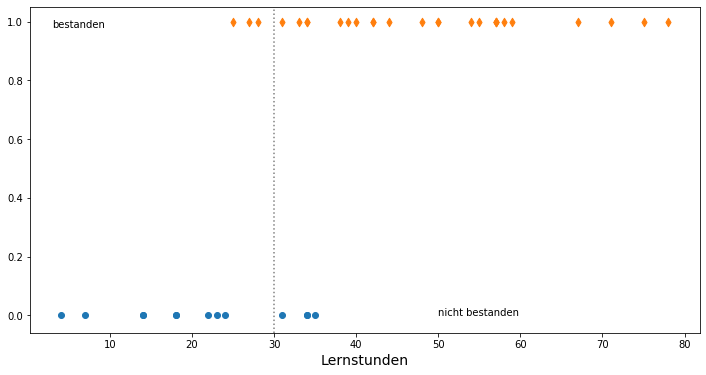

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(X[y==0], y[y==0], marker='o')
plt.scatter(X[y==1], y[y==1], marker='d')
plt.xlabel("Lernstunden", fontsize=14)
plt.text(3, .98, "bestanden")
plt.text(50, 0, "nicht bestanden")
plt.axvline(x=30, c='grey', ls=':', label="Entscheidungsgrenze")
plt.savefig("LogistischeRegression03.png",transparent=True, dpi=300)
plt.show()


Da wir noch nicht wissen, wie wir eine Funktion herleiten können, die auf Grundlage der Lernstunden die Wahrscheinlichkeitsverteilung für das Bestehen der Klausur voraussagt, überlegen wir, wie so eine Funktion aussehen könnte.
Im Diagramm unten abgebildet, ist der Graph der Funktion `prob`, die eine Schätzung der Wahrscheinlichkeitsverteilung für das Bestehen der Klausur unter Angabe der Lernstunden darstellt.

Diese Funktion ist ein mögliches Modell für die Wahrscheinlichkeiten eines Erfolgs.
Wenn man nun die Entscheidungsgrenze bei `prob(x)=0.5` anlegt sieht man, dass die Funktion suboptimal ist.

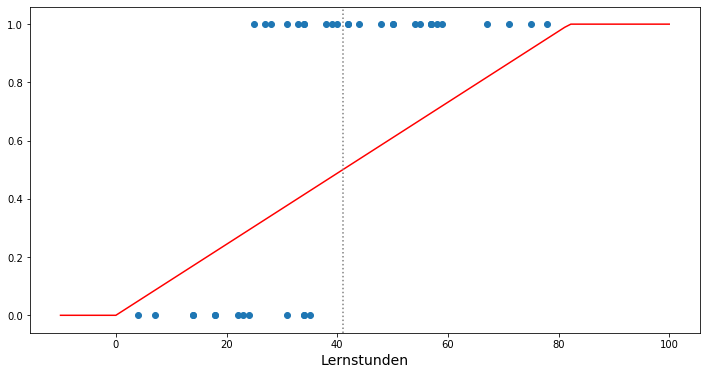

(1, 81)

In [10]:
epsilon = 1e-3
miny = X.min()-3
maxy = X.max()+3

@np.vectorize
def prob(x,a,b):
    a = a-1
    b = b+1
    if x<a: return 0.0
    elif x>b: return 1.0
    else:
        res = 1/(b-a) * x - (a/(b-a))
        assert res<1, "Für x=%f ergibt die W'keit 1" % x
        return res
    
xx = np.linspace(-10,100,100)
plt.figure(figsize=(12,6))
plt.scatter(X, y)
plt.xlabel("Lernstunden", fontsize=14)
plt.plot(xx, prob(xx,miny,maxy), c='r')
plt.axvline(x=miny+(maxy-miny)*.5, c='grey', ls=':')

plt.savefig("LogistischeRegression04.png",transparent=True, dpi=300)
plt.show()
miny, maxy

Wir verwenden nun unsere geschätzte Wahrscheinlichkeitsverteilung, um die *Chancen* (auf einen Erfolg) zu berechnen.
In der Statistik beschreibt die Chance (engl *odds*) den Quotienten aus der Wahrscheinlichkeit $p$ eines Ereignisses und seiner Gegenwahrscheinlichkeit: $\frac{p}{1-p}$.

Beim Münzwurf beträgt die Chance z.B.  1:1 (Wahrscheilichkeit $\frac{0,5}{0,5}$ oder "ein guter Fall, ein schlechter Fall"), beim Würfeln einer sechs 1:5.

Bei einer Wahrscheinlichkeit von 0 ist die Chance ebenfalls 0 ($\frac{0}{1}$). Je weiter sich die Wahrscheinlichkeit für einen Erfolg der 1 nähert, desto größer wird die Chance: $\lim\limits_{p \rightarrow 1}{\frac{p}{1-p}}=\infty$

[0, 80, -0.1, 10]

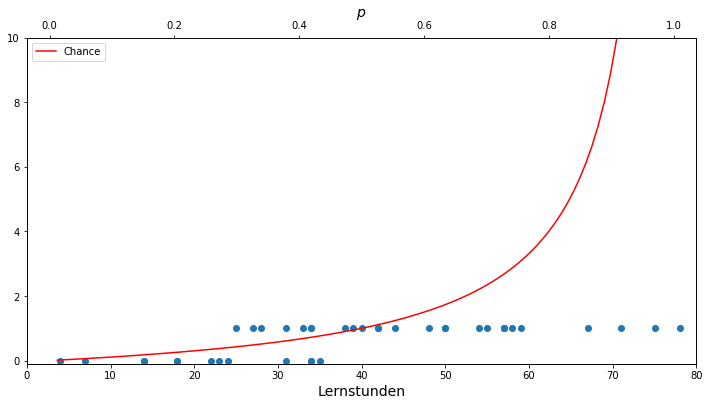

In [11]:
@np.vectorize
def chance(x):
    assert x<1, "Für x=%f sind die Chancen nicht definiert" % x
    return x/(1-x)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

xx = np.linspace(miny+epsilon,maxy-epsilon,100)
ax1.scatter(X, y)

xxx = prob(xx,miny,maxy)

ax1.set_xlabel("Lernstunden", fontsize=14)
ax2.set_xlabel(r"$p$", fontsize=14)
ax2.plot(xxx, chance(xxx), c='r', label="Chance")
plt.legend(loc='upper left')
plt.savefig("LogistischeRegression_Chance.png",transparent=True, dpi=300)
ax1.axis([0,80,-0.1,10])

Im obigen Graph sind auf der x-Achse die Lernstunden für die Datenpunkte sowie die Bestehens-Wahrscheinlichkeit $p$ für die Funktion *Chance* aufgetragen.
Unabhängig von dem Anwendungsfall besitzt *Chance* für jede lineare Wahrscheinlichkeitsfunktion $P(X=x_i)$ die gleiche Form.


Nun transformieren wir die Chance-Funktion mit dem (natürlichen) Logarithmus aus dem Wertebereich $[0,\infty[$ in den Bereich $]-\infty,\infty[$.

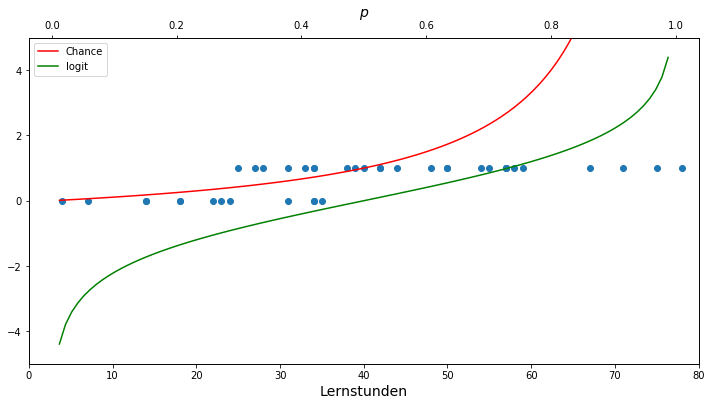

In [12]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.scatter(X, y)
ax1.set_xlabel("Lernstunden", fontsize=14)
ax2.set_xlabel(r"$p$", fontsize=14)
xxx = prob(xx,miny,maxy)
ax2.plot(xxx, chance(xxx), c='r', label="Chance")
ax2.plot(xxx, np.log(chance(xxx)), c='g', label="logit")
plt.legend(loc='upper left')
ax1.axis([0,80,-5,5])
plt.savefig("LogistischeRegression06.png",transparent=True, dpi=300)
plt.show()

Die resultierende **logit** Funktion läuft "in der Mitte", also ca. dem Bereich $[0.2,0.8]$ annähernd linear.
Daher können wir die Kurve durch ein lineares Modell approximieren.

In [13]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

xxx = prob(X,miny,maxy)
XX = X.reshape(-1, 1)
yy = np.log(chance(xxx)).reshape(-1, 1)
    
linreg.fit(XX,yy)
t0 = linreg.intercept_
t1 = linreg.coef_
t0, t1

(array([-2.55561926]), array([[0.06279869]]))

Im unten angegebenen Graph sind *Chance* und *logit* Funktionen der Wahrscheinlichkeit.
Die Funktion *model* hingegen, hängt von den Lernstunden ab.
Man sieht, dass sich die Modellfunktion und die Logit-Funktion im Mittelteil recht gut überdecken.

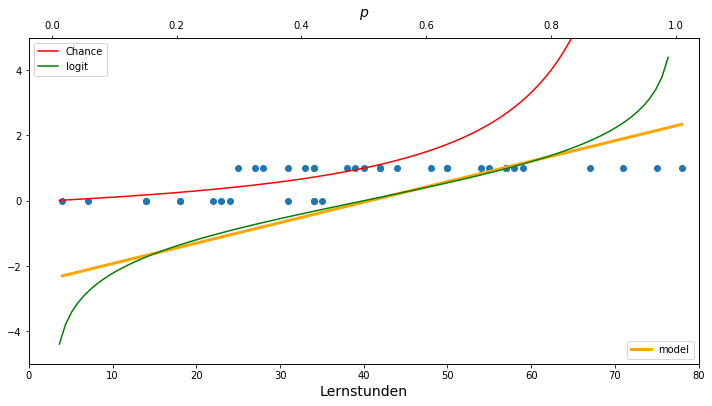

In [14]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.set_xlabel("Lernstunden", fontsize=14)
ax2.set_xlabel(r"$p$", fontsize=14)

ax1.scatter(X, y)
xxx = prob(xx,miny,maxy)
ax2.plot(xxx, chance(xxx), c='r', label="Chance")
ax2.plot(xxx, np.log(chance(xxx)), c='g', label="logit")
modely = list(map(lambda x: (t0+t1*x).item(0), X))
modelx, modely = zip(*sorted(zip(X, modely)))
ax1.plot(modelx, modely, c='orange', label="model", linewidth=3)
ax2.legend(loc='upper left')
ax1.legend(loc='lower right')
ax1.axis([0,80,-5,5])
plt.savefig("LogistischeRegression07.png",transparent=True, dpi=300)
plt.show()

Wir haben bisher mit der "selbst ausgedachten" Verteilungsfunktion für die Wahrscheinlichkeiten *prob* gearbeitet.
Durch Anwenden der Logit-Funktion auf *prob* haben wir eine Funktion erzeugt, die wir mit mit einem linearen Model $\Theta^Tx$ approximieren können.

Wir wollen nun betrachten, wie man die Wahrscheinlichkeitsfunktion allgemein bestimmen kann.
Wir wissen, dass sich die Logit-Funktion $logit(x)=ln(chance(x))$ äquivalent zu der lineatren Funktion $h_{\Theta}(x)=\Theta^Tx$ verhält. Wir können nun durch Einsetzen und Umformen die Verteilungsfunktion $p(x)$ herleiten:

$$ln(chance(x)) \thicksim \Theta^Tx$$

$$\Leftrightarrow chance(x) \thicksim e^{\Theta^Tx}$$

$$\Leftrightarrow \frac{p(x)}{1-p(x)} \thicksim e^{\Theta^Tx}$$

$$\Leftrightarrow \frac{p(x)}{1-p(x)} \cdot \frac{1/p(x)}{1/p(x)} \thicksim e^{\Theta^Tx}$$

$$\Leftrightarrow \frac{1}{p(x)^{-1}-1} \thicksim e^{\Theta^Tx}$$

$$\Leftrightarrow p(x)^{-1}-1 \thicksim e^{-\Theta^Tx}$$

$$\Leftrightarrow p(x)^{-1} \thicksim 1+e^{-\Theta^Tx}$$

$$\Leftrightarrow p(x) \thicksim \frac{1}{1+e^{-\Theta^Tx}}$$

Damit haben wir hergeleitet, dass sich die Wahrscheinlichkeitsverteilung als Sigmoidfunktion in Abhängigkeit der Modellparameter $\Theta$ sowie den Werten der unabhängigen Variablen darstellen lässt.
So haben wir die **Modellfunktion** für unser Klassifikationsproblem erhalten:

$$
h_{\Theta}(x) = \frac{1}{1+e^{-\Theta^Tx}}
$$

Bei der hergeleiteten Funktion handelt es sich um die sogenannte *Logistische Funktion*, eine spezielle Form der *Sigmoiodfunktion*.
Sigmoidfunktionen werden aufgrund Ihrer einfachen Differenzierbarkeit (es gilt $sig'(x)=sig(x)(1-sig(x))$) häufig in künstlichen neuronalen Netzen als sogenannte *Aktivierungsfunktion* verwendet.

Als nächsten Schtritt wollen wir nun betrachten, welche **Kostenfunktion** wir zur Bestimmung der Parameter $\Theta$ anwenden können.
Bei der linearen Regression haben wir als Kostenfunktion die Summe der Fehlerquadrate verwendet.
Schauen wir uns zunächst an, welche Kostenfunktion dieser Ansatz für die Sigmoidfunktion liefert.

Wir erweitern zuerst unsere Matrix `X` um eine Spalten mit Einsen für die Bestimmung des Bias-Parameters $\Theta_0$.

In [15]:
vone = (np.ones(len(X))).reshape(-1,1)
XX = X.reshape(-1,1)
XX = np.concatenate((vone, XX), 1)
yy = y.reshape(-1,1)
# Und wieder zurück:
#X = X[:,1:]
#X = X.reshape(1,-1)[0]

Im folgenden Code-Abschnitt wird die Kostenfunktion $J_{\Theta}(x)$ geplottet.
Um die Funktion 2-dimensional darstellen zu können, setzen wir einen Parameter $\Theta_0$ fest.

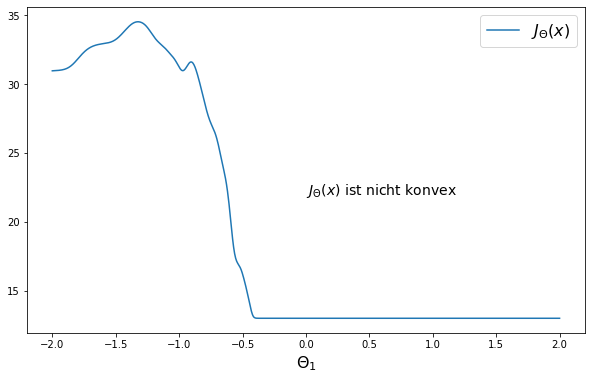

In [16]:
def h(X,theta):
    r = 1.0 / (1.0+np.exp(-(X@theta)))
    return r

def J(X,theta,y):
    j = (h(X,theta)-y).T@(h(X,theta)-y)
    return j

yt1 = []
xt1 = []

for t in np.linspace(-2,2,1000):
    xt1.append(t)
    theata0 = np.array([33, t]).reshape((2,1))
    yt1.append(J(XX,theata0,yy).item(0))


plt.figure(figsize=(10,6))
plt.plot(xt1, yt1, label=r'$J_{\Theta}(x)$')
plt.legend(loc='upper right', prop={'size': 16})
plt.xlabel(r'$\Theta_1$', fontsize=16)
plt.text(0, 22, r'$J_{\Theta}(x)$ ist nicht konvex', fontsize=14)
plt.savefig("LogistischeRegression08.png",transparent=True, dpi=300)
plt.show()

Man erkennt direkt, dass lokale Minimima existieren und dass diese Funktion $J$ damit nicht konvex sein kann.
Aus diesem Grund lässt sich das Gradientenverfahren nicht auf die Kostenfunktion anwenden.
Je nachdem, wo man mit der Parameteroptimierung startet, könnte die Suche in ein lokales Minimum laufen und damit die optimalen Modellparameter nicht finden.

Da die Methode der Fehlerquadrate nicht zielführend ist, verwendet man der logistischen Regression eine andere Kostenfunktion.

Die Funktion $\hat{J}_{\Theta}(x)$ verwendet die Logarithmusfunktion angewendet auf $h_{\Theta}(x)$ und in Abhängigkeit von $y$.

$$
\begin{equation*}
\hat{J}_{\Theta}(x)=\begin{cases}
-\log (h_{\Theta}(x)) & \text{falls } y=1\\
-\log (1-h_{\Theta}(x)) & \text{falls } y=0
\end{cases}
\end{equation*}
$$

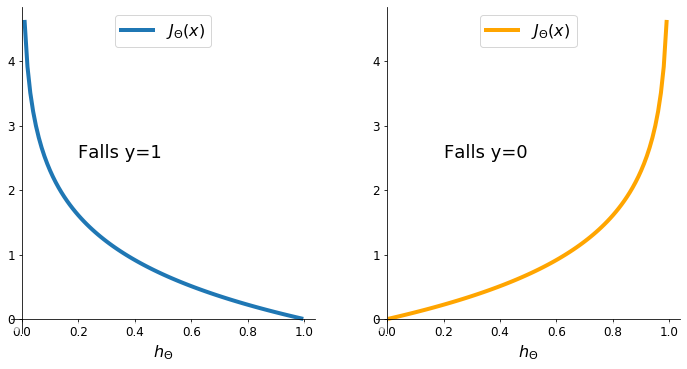

In [17]:
xx = np.arange(0.01, 1, .01)

fig, axs =plt.subplots(1, 2, figsize=(12,6))                    


axs[0].plot(xx, -np.log(xx), linewidth=4, label=r'$J_{\Theta}(x)$')
axs[1].plot(xx, -np.log(1-xx), linewidth=4, label=r'$J_{\Theta}(x)$', c='orange')
for i in [0,1]:
    axs[i].spines['right'].set_color('none')
    axs[i].spines['top'].set_color('none')
    axs[i].spines['left'].set_position(('data',0))
    axs[i].spines['bottom'].set_position(('data',0))
    axs[i].xaxis.set_ticks_position('bottom')
    axs[i].yaxis.set_ticks_position('left')
    for label in axs[i].get_xticklabels() + axs[i].get_yticklabels():
        label.set_fontsize(12)
        label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))
    axs[i].legend(loc='upper center', prop={'size': 16})
    axs[i].set_xlabel(r'$h_{\Theta}$', fontsize=16)

axs[0].text(0.2, 2.5, 'Falls y=1', fontsize=18)
axs[1].text(0.2, 2.5, 'Falls y=0', fontsize=18)

plt.savefig("LogistischeRegression09.png",transparent=True, dpi=300)   
plt.show()


Die Kostenfunktion $\hat{J}_{\Theta}(x)$ ist konvex, daher können wir das Gradientenverfahren anwenden.

Um die Fallunterscheidung für $y=0$ und $y=1$ zu eliminieren, können wir $\hat{J}$ auch so formulieren:

$$
\hat{J}_{\Theta}(x)= -y\log(h_{\Theta}(x))- ( (1-y)\log(1-h_{\Theta}(x)))
$$

Um die endgültige Kostenfunktion zu erhalten, skalieren wir die Funktion noch durch die Anzahl der Datenpunkte und erhalten so

$$
J_{\Theta}(x)= \frac{1}{m} -y\log(h_{\Theta}(x))- ( (1-y)\log(1-h_{\Theta}(x)))
$$


Nun können wir das Gradientenverfahren anwenden.
Skalieren wir wie gewohnt zuerst die Werte der Merkmale.

In [18]:
y = y.reshape(-1,1)

scaling_factors = np.abs(XX[:,1:].max(axis=0)-XX[:,1:].min(axis=0))
scaling_factors = np.concatenate([[1.0], scaling_factors])

X_scaled = XX/scaling_factors
X_scaled[0:5,]

array([[1.        , 0.74324324],
       [1.        , 0.2972973 ],
       [1.        , 0.24324324],
       [1.        , 0.59459459],
       [1.        , 0.77027027]])

Im folgenden Code-Abschnitt werden die Modell-, Kosten- und Gradient-Descent Funktionen definiert.

In [19]:
def h(X,theta):
    return  1.0 / (1.0+np.exp(-(X@theta)))

def J(X,theta,y):
    yy = h(X,theta)
    return -1/len(y) * (y.T@np.log(yy) + ((1-y).T@np.log(1-yy)))

def gradient_descent(X, y, theta, alpha, iterationen):
    kosten = []
    for iter in range(iterationen):
        costs = J(X, theta, y)
        kosten.append(costs.item(0))
        gradient = 1/len(y) * (X.T @ (h(X, theta) - y))
        theta = theta - (alpha * gradient)
    return theta, kosten

Nun können wir die Parameter des Modells trainieren.

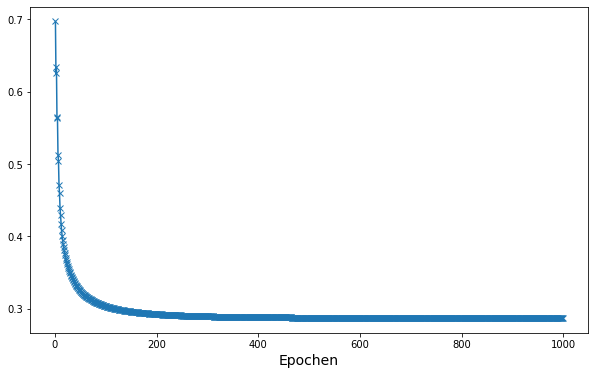

array([[-7.68954059],
       [ 0.2473374 ]])

In [20]:
theta0 = np.array([0,0]).reshape(2,1)

X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.3, random_state=0)
X_train/=scaling_factors

y = y.reshape(-1,1)
theta_scaled, kosten = gradient_descent(X_train, y_train, theta0, 8, 1000)
plt.figure(figsize=(10,6))
plt.plot(range(1,len(kosten)),kosten[1:], "x-")
plt.xlabel("Epochen", fontsize=14)
plt.savefig("LogistischeRegression10.png",transparent=True, dpi=300)
plt.show()
theta_gd = (theta_scaled.T/scaling_factors).T
theta_gd

Wir testen nun das trainierte Modell mit dem Testdatensatz und bestimmen die Vorhersagegenauigkeit.

In [21]:
theta_gd
pred_gd = np.array([h(X_test,theta_gd)>=0.5])*1
acc_gd=100-np.sum(np.abs(pred_gd-y_test))*100/len(y_test)
print("Vorhersagegenauigkeit: %.2f%%" % acc_gd)

Vorhersagegenauigkeit: 83.33%


Nun wollen wir noch testen, zu welchen Ergebnissen die logistische Regression aus der Scikil-Learn Bibliothek kommt.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XX[:,1:], y.reshape(-1), test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

logreg.intercept_, logreg.coef_

(array([-7.71744494]), array([[0.24816198]]))

Wie man sieht, sind die Parameter sehr ähnlich zu denen, die unser "hand-kodiertes" Gradientenverfahren liefert.
Auch die Vorhersagedenauigkeit dieses Modells ist nahezu identisch.

In [23]:
y_pred = logreg.predict(X_test)
acc_test=100-np.sum(np.abs(y_pred-y_test))*100/len(y_pred)

print("Vorhersagegenauigkeit: %.2f%%" % acc_test)


Vorhersagegenauigkeit: 83.33%


Nun Plotten wir noch die edgültige Modellfunktion und tragen die Entscheidungsgrenze bei $h_{\Theta}(x)=0.5$ ein.

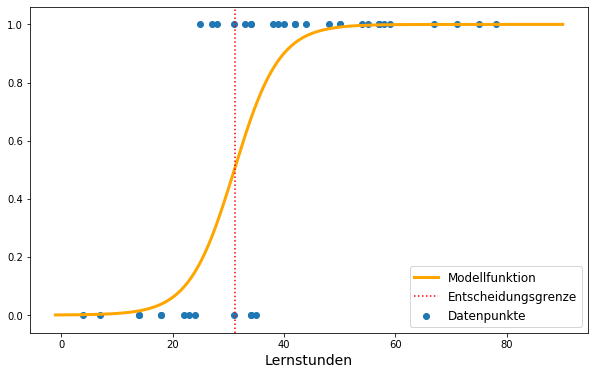

In [24]:
theta_gd = (theta_scaled.T/scaling_factors).T

xx = np.linspace(-1,90,300).reshape(-1,1)
xx = np.concatenate(((np.ones(len(xx))).reshape(-1,1), xx), 1)
yy = h(xx,theta_gd)

i = 0
while(yy[i]<0.5): i+=1
xx[:,1][i]

plt.figure(figsize=(10,6))
plt.plot(xx[:,1], yy, c='orange', label="Modellfunktion", linewidth=3)
plt.scatter(X, y, label="Datenpunkte")
plt.xlabel("Lernstunden", fontsize=14)
plt.axvline(x=xx[:,1][i], c='r', ls=':', label="Entscheidungsgrenze")
plt.legend(loc='lower right', prop={'size': 12})
plt.savefig("LogistischeRegression11.png",transparent=True, dpi=300)
plt.show()

## Multiklassen-Klassifikation 

Die logistische Regression liefert uns Ergebnisse für binäre Zielvariable.
Oftmals wollen wir aber mehr als 2 Klassen unterscheiden.

Eine Möglichkeit, um Multiklassen-Klassifikation mit logistischen Regression umzusetzen ist die sogenannte *One-vs-all Klassifikation*.
Dabei werden für `n` Klassen `n` separate, binäre Klassifikationsprobleme definiert, bei denen jeweils nur die betrachtete Klasse den Zielwert `1` zugeteilt bekommt, und für alle anderen Klassen der Zielwert `0` angenommen wird.

Scikit-Learn unterstüzt Multiklassen-Klassifikation in der Klasse `LogisticRegression` über den Parameter `multi_class`.
Setzt man : `multi_class="ovr"` benutzt die führt die Funktion `fit` je eine logistische Regression für jedes Label nach dem *one-vs-all* (oder auch *one-vs-rest*, ovr) Prinzip aus.

In der folgenden Code-Zelle erzeugen wir 3 Punktwolken.
Alle Punkte einer "Wolke" sollen zu einer bestimmten Klasse gehören.

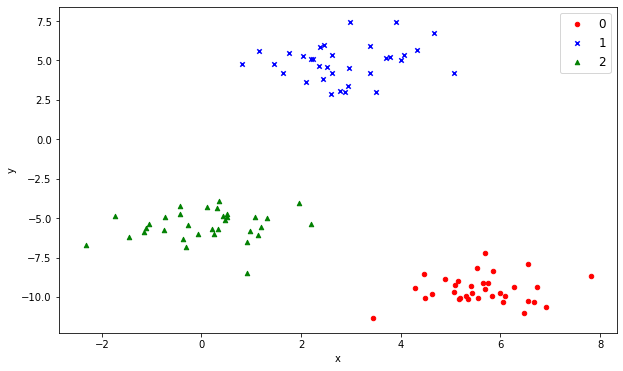

In [28]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame

X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=10)

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
markers = {0:'o', 1:'x', 2:'^'}

fig, ax = plt.subplots(figsize=(10,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, marker=markers[key], color=colors[key])
    
plt.legend(loc='upper right', prop={'size': 12})
plt.savefig("LogistischeRegression20.png",transparent=True, dpi=300)
plt.show()

Nun wenden wir ein logistisches Regressionsmodell auf die Datenbasis an.

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logreg = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

pipeline = Pipeline([
    ('scaler',MinMaxScaler()),
    ('model', LogisticRegression(solver='lbfgs',multi_class="ovr"))
])

pipeline.fit(X_train,y_train)

params0 = pipeline.named_steps["model"].intercept_
paramsi  = pipeline.named_steps["model"].coef_

params0, paramsi


(array([-1.40954684, -2.8989822 ,  1.83784718]),
 array([[ 2.86252928, -2.85575428],
        [ 0.53161969,  4.1906353 ],
        [-3.53130388, -1.56501811]]))

Der folgende Graph zeigt die Entscheidungsgrenzen für das Klassifikationsmodell.
Alle Punkte innerhalb eines Bereiches werden der jeweiligen Klasse zugeordnet.

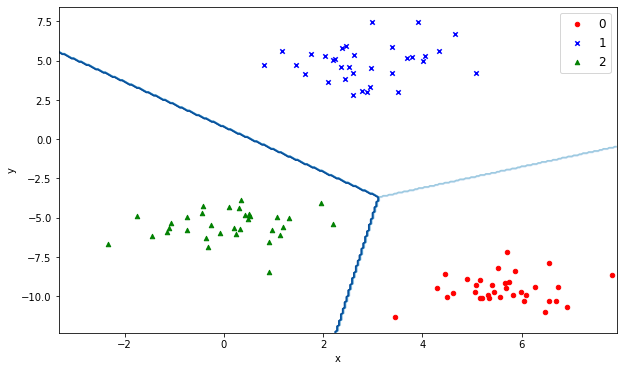

In [30]:
i=0
xx = np.linspace(X_train[:,0].min()-1, X_train[:,0].max()+1, 300)
yy = np.linspace(X_train[:,1].min()-1, X_train[:,1].max()+1, 300)
XX, YY = np.meshgrid(xx,yy)
ZZ = pipeline.predict(np.c_[XX.ravel(), YY.ravel()])
ZZ = ZZ.reshape(XX.shape)

yyy = params0[0] + paramsi[0][0]*xx + paramsi[0][1]*yy

colors = {0:'red', 1:'blue', 2:'green'}
markers = {0:'o', 1:'x', 2:'^'}
fig, ax = plt.subplots(figsize=(10,6))
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, marker=markers[key], color=colors[key])
    

plt.contour(XX, YY, ZZ, cmap=plt.cm.Blues)
plt.legend(loc='upper right', prop={'size': 12})
plt.savefig("LogistischeRegression21.png",transparent=True, dpi=300)
plt.show()